In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df  = df.drop(columns='PassengerId')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    
    df[i] = le.fit_transform(df[i])

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,108,1,28,1,0,523,18,147,2
1,1,0,190,0,51,1,0,596,207,81,0
2,1,2,353,0,34,0,0,669,41,147,2
3,1,0,272,0,47,1,0,49,189,55,2
4,0,2,15,1,47,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,147,2
887,1,0,303,0,24,0,0,14,153,30,2
888,0,2,413,0,88,1,2,675,131,147,2
889,1,0,81,1,34,0,0,8,153,60,0


In [15]:
x = df.iloc[:,1:5] # 1t for rows and second for columns
x

,Pclass,Name,Sex,Age
0,2,108,1,28
1,0,190,0,51
2,2,353,0,34
3,0,272,0,47
4,2,15,1,47
...,...,...,...,...
886,1,548,1,35
887,0,303,0,24
888,2,413,0,88
889,0,81,1,34


In [24]:
kmeans = KMeans(3)
kmeans.fit(x)

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=6)

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([5, 1, 4, 1, 5, 2, 2, 3, 4, 3, 3, 5, 3, 5, 0, 4, 3, 0, 0, 2, 1, 5,
       2, 0, 3, 5, 1, 1, 3, 0, 0, 0, 4, 0, 2, 4, 2, 5, 0, 3, 5, 0, 2, 2,
       1, 3, 2, 3, 3, 5, 3, 3, 4, 1, 3, 0, 3, 3, 0, 4, 0, 4, 4, 0, 0, 2,
       3, 1, 5, 2, 4, 4, 4, 1, 5, 2, 0, 2, 5, 1, 0, 0, 2, 5, 4, 5, 1, 0,
       1, 1, 1, 5, 1, 1, 1, 0, 4, 4, 1, 4, 3, 3, 0, 4, 4, 2, 3, 2, 3, 2,
       3, 0, 5, 4, 5, 3, 1, 0, 5, 5, 4, 2, 2, 0, 0, 3, 2, 2, 3, 1, 1, 1,
       3, 0, 0, 3, 3, 1, 3, 1, 5, 3, 4, 5, 5, 3, 5, 1, 3, 5, 5, 3, 2, 0,
       3, 0, 4, 1, 0, 3, 1, 0, 5, 5, 3, 4, 1, 0, 5, 2, 0, 3, 4, 0, 0, 2,
       2, 4, 4, 2, 3, 3, 5, 5, 2, 3, 3, 3, 5, 0, 3, 5, 5, 3, 5, 2, 2, 3,
       2, 0, 0, 3, 4, 0, 1, 0, 5, 5, 5, 5, 5, 5, 3, 4, 2, 3, 4, 4, 5, 4,
       0, 5, 4, 3, 4, 5, 2, 2, 1, 2, 4, 2, 0, 5, 2, 4, 4, 1, 3, 4, 0, 2,
       1, 2, 5, 2, 2, 4, 5, 1, 3, 0, 0, 2, 3, 0, 0, 1, 0, 3, 0, 5, 0, 4,
       4, 3, 3, 3, 4, 5, 5, 0, 2, 2, 4, 5, 2, 3, 3, 5, 1, 3, 0, 1, 0, 0,
       0, 2, 4, 1, 5, 5, 2, 4, 2, 2, 4, 5, 3, 5, 2,

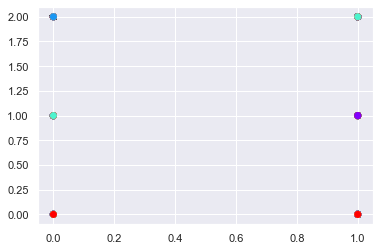

In [28]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Survived'],data_with_clusters['Pclass'],c=data_with_clusters['Clusters'],cmap='rainbow')

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'WCSS')

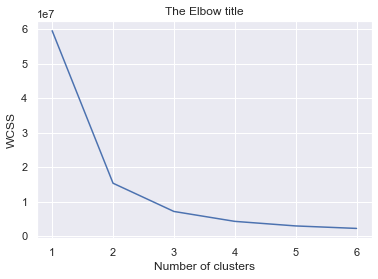

In [29]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

    number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')